### Ion channels enable electrical communication in bacterial communities
Arthur Prindle, Jintao Liu, Munehiro Asally, San Ly, Jordi Garcia-Ojalvo, and Gürol M. Süel
<br>
https://www.nature.com/articles/nature15709

**Figure 3e: Effect of trkA on propagation**<br>
Jordi Garcia-Ojalvo, jordi.g.ojalvo@upf.edu

---

Here we model the effect of the trkA deletion on the propagation of a pulse. We use a spatially extended version of the single-cell model. This is a mesoscopic model, in which the variables represent now the local averages of the membrane potential, stress, and ThT across a population of cells small enough so that the local concentration of extracellular potassium in their neighborhood (which is represented by E in this mesoscopic model) is homogeneous, but large enough so that diffusion of E is well-defined.

Running this code requires the C compiler `cc` and the utility `make`. Both are available by default in Linux, or by installing the `Xcode` development environment in Mac OS X.

First we load some python packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import subprocess

plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['axes.facecolor'] = '#f2f2f2'

Now we compile the C code:

In [2]:
p = subprocess.Popen(["make"],stdout=subprocess.PIPE,stderr=subprocess.PIPE)
while True:
    ln = p.stdout.readline().decode().rstrip()
    if ln == '':
            break
    print(ln)
while True:
    ln = p.stderr.readline().decode().rstrip()
    if ln == '':
            break
    print(ln)

cc -I/Users/ojalvo/include kch1d.o dran.o -o kch1d -lm


Next we define a parameter file (which will be saved in the `output` directory):

In [3]:
pfile = open('output/da.par', 'w')
pfile.write('30    !gk\n')
pfile.write('0.2    !gl\n')
pfile.write('-380    !Vk\n')
pfile.write('-156    !Vl\n')
pfile.write('0.04    !Sth\n')
pfile.write('-150    !Vth\n')
pfile.write('2    !a0\n')
pfile.write('1.3    !b0\n')
pfile.write('1    !m\n')
pfile.write('0.2    !sa\n')
pfile.write('10    !ge\n')
pfile.write('8   !dl\n')
pfile.write('1    !dk\n')
pfile.write('0.001    !bs\n')
pfile.write('0.1     !gs\n')
pfile.write('4      !gt\n')
pfile.write('5.6    !F\n')
pfile.write('0.0828         !D\n')
pfile.write('0         !dasym\n')
pfile.write('80.0        !Twarm\n')
pfile.write('40.0        !Tpert\n')
pfile.write('0.1        !Spert\n')
pfile.write('0.          !intensity_of_initial_conditions\n')
pfile.write('41          !system_size\n')
pfile.write('220.0         !final_time\n')
pfile.write('0.1          !measuring_time\n')
pfile.write('0.03         !lattice_spacing\n')
pfile.write('0.001        !integration_time_step\n')
pfile.write('122          !random_number_generator_seed\n')
pfile.close()

Now we run the C code using the parameter file that we created above (if the cell below produces no output, it means the code was run successfully). This code will create an output file with the extension `dat` in the directory `output`.

In [4]:
p = subprocess.Popen(["./kch1d","output/da"],stdout=subprocess.PIPE,stderr=subprocess.PIPE)
while True:
    ln = p.stdout.readline().decode().rstrip()
    if ln == '':
            break
    print(ln)
while True:
    ln = p.stderr.readline().decode().rstrip()
    if ln == '':
            break
    print(ln)

Now we extract the data from the C output file, and compute the maxima of the pulse at all locations:

In [5]:
content = None
with open('output/da.dat', 'r') as f:
    content = f.readlines()
nrows = len(content)     
dummy = content[0].split('\t')
dummy = [el for el in dummy if len(el) > 0 and el != '\n']
ncols = len(dummy)
dvec = np.empty((nrows,ncols))

iline = 0
for line in content:
    dummy = line.split('\t')
    dummy = [el for el in dummy if len(el) > 0 and el != '\n']
            
    if len(dummy) > 1:
        dvec[iline,:] = dummy
        iline = iline + 1

ncells = int((ncols-1)/5)
tvec0 = dvec[:,0]
fmax = np.zeros(ncells)
for i in range(ncells):
    fvec0 = dvec[:,5*(i+1)]
    fvec = fvec0[np.where((tvec0>110) & (tvec0<220))]
    fmax[i] = np.amax(fvec)
crange = range(ncells)

Next we simulate the trkA deletion using the same procedure:

In [6]:
# We create the parameter file

pfile = open('output/db.par', 'w')
pfile.write('19.785    !gk\n')
pfile.write('0.2    !gl\n')
pfile.write('-380    !Vk\n')
pfile.write('-156    !Vl\n')
pfile.write('0.04    !Sth\n')
pfile.write('-150    !Vth\n')
pfile.write('2    !a0\n')
pfile.write('1.3    !b0\n')
pfile.write('1    !m\n')
pfile.write('0.2    !sa\n')
pfile.write('9    !ge\n')
pfile.write('8   !dl\n')
pfile.write('1    !dk\n')
pfile.write('0.001    !bs\n')
pfile.write('0.1     !gs\n')
pfile.write('4      !gt\n')
pfile.write('5.6    !F\n')
pfile.write('0.0828         !D\n')
pfile.write('0         !dasym\n')
pfile.write('80.0        !Twarm\n')
pfile.write('40.0        !Tpert\n')
pfile.write('0.1        !Spert\n')
pfile.write('0.          !intensity_of_initial_conditions\n')
pfile.write('41          !system_size\n')
pfile.write('220.0         !final_time\n')
pfile.write('0.1          !measuring_time\n')
pfile.write('0.03          !lattice_spacing\n')
pfile.write('0.001        !integration_time_step\n')
pfile.write('122          !random_number\n')
pfile.close()

# We run the code

p = subprocess.Popen(["./kch1d","output/db"],stdout=subprocess.PIPE,stderr=subprocess.PIPE)
while True:
    ln = p.stdout.readline().decode().rstrip()
    if ln == '':
            break
    print(ln)
while True:
    ln = p.stderr.readline().decode().rstrip()
    if ln == '':
            break
    print(ln)

# We extract the data from the C output file

content = None
with open('output/db.dat', 'r') as f:
    content = f.readlines()
nrows = len(content)     
dummy = content[0].split('\t')
dummy = [el for el in dummy if len(el) > 0 and el != '\n']
ncols = len(dummy)
dvec = np.empty((nrows,ncols))

iline = 0
for line in content:
    dummy = line.split('\t')
    dummy = [el for el in dummy if len(el) > 0 and el != '\n']
            
    if len(dummy) > 1:
        dvec[iline,:] = dummy
        iline = iline + 1

# We compute the maxima of the pulse at all spatial locations

tvec0 = dvec[:,0]
fmax2 = np.zeros(ncells)
for i in range(ncells):
    fvec0 = dvec[:,5*(i+1)]
    fvec = fvec0[np.where((tvec0>110) & (tvec0<220))]
    fmax2[i] = np.amax(fvec)
crange = np.arange(ncells)

We now fit the leading edge of the front in both the wild-type and trkA deletions with a linear function:

In [7]:
inmin0 = 18
inmax0 = -7
inmin = -11
inmax = -8
xdat = crange[inmin:inmax]
ydat = fmax[inmin:inmax]/np.amax(fmax[inmin0:inmax0])
ydat2 = fmax2[inmin:inmax]/np.amax(fmax2[inmin0:inmax0])

def flin(x,a,b):
    return a*x+b

guess = [-0.1, -10]
params, params_covariance = optimize.curve_fit(flin, xdat, ydat, guess)
xfit = np.linspace(np.amin(xdat),np.amax(xdat),20)
yfit = flin(xfit,params[0],params[1])

params, params_covariance = optimize.curve_fit(flin, xdat, ydat2, guess)
xfit2 = np.linspace(np.amin(xdat),np.amax(xdat),20)
yfit2 = flin(xfit2,params[0],params[1])


Finally we can compare the profiles of the two biofilms near the end of the wave, using the linear approximation for both cases:

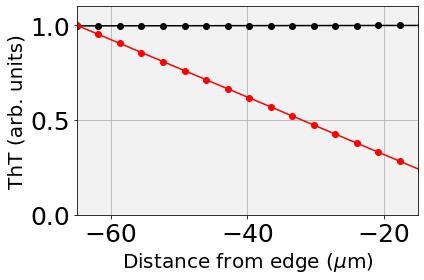

In [8]:
fig=plt.figure()
dx = 0.03*1000
plt.plot(xfit*dx-965,yfit/np.amax(yfit),'ko-')
plt.plot(xfit2*dx-965,yfit2/np.amax(yfit2),'ro-')
plt.xlabel('Distance from edge ($\mu$m)',fontsize=20)
plt.ylabel('ThT (arb. units)',fontsize=20)
plt.ylim([0,1.1])
plt.xlim([-65,-15])
plt.tight_layout()
plt.grid()
plt.show()
fig.savefig('figures/fig3e.pdf')